<a href="https://colab.research.google.com/github/jnsbrdbr/final_thesis/blob/main/10.2_Gan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-rc0

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.8.0


In [ ]:
import keras
from keras.layers import Input, Dense, Activation, LeakyReLU, BatchNormalization
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
import keras.backend as K
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os

%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import jaccard_score
from scipy.spatial.distance import pdist, squareform

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
!pip3 install pickle5
import pickle5 as pickle

     |████████████████████████████████| 256 kB 4.1 MB/s 


In [ ]:
with open('/content/drive/MyDrive/10000/unsmote/TUnsmote_Tresult.pkl', "rb") as fh:
  result = pickle.load(fh)

In [ ]:
#final data
print(result)

             0         1         2         3         4          5         6  \
0    -0.018442 -4.220618 -0.916300 -0.715505 -0.868530  -1.348268 -0.474432   
1    -0.018442 -4.220618 -0.916300 -0.715505 -0.868530  -1.348268 -0.474432   
2    -0.018442 -4.220618 -0.916300 -0.715505 -0.868530  -1.348268 -0.474432   
3    -0.018442 -4.220618 -0.916300 -0.715505 -0.868530  -1.348268 -0.474432   
4    -0.018444 -4.221080 -0.916678 -0.715889 -0.869072  -1.349276 -0.475212   
...        ...       ...       ...       ...       ...        ...       ...   
9995 -0.264492 -4.771727 -2.334318 -2.416962 -8.513026  15.729413  0.366719   
9996 -0.264492 -4.771727 -2.334318 -2.416962 -8.513026  15.729413  0.366719   
9997 -0.264492 -4.771727 -2.334318 -2.416962 -8.513026  15.729413  0.366719   
9998 -0.264492 -4.771727 -2.334318 -2.416962 -8.513026  15.729413  0.366719   
9999 -0.264492 -4.771727 -2.334318 -2.416962 -8.513026  15.729413  0.366719   

             7         8         9  ...          1 

In [ ]:
#divide data in to data_label and non_data label

import copy
result_nonlabel=copy.deepcopy(result)
del result_nonlabel['label']
X=result_nonlabel
y=result.label

In [ ]:
#splitting data in to test and train...

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,random_state=42,test_size=0.3)#

In [ ]:
print('shape of x_train is:',X_train.shape)
print('shape of x_test is:',X_test.shape)

shape of x_train is: (7000, 100)
shape of x_test is: (3000, 100)


In [ ]:
def make_latent_samples(n_samples, sample_size):
    #return np.random.uniform(-1, 1, size=(n_samples, sample_size))
    return np.random.normal(loc=0, scale=1, size=(n_samples, sample_size))

In [ ]:
make_latent_samples(1, 100) # generates one sample

array([[-0.8982477 ,  2.35302517,  0.35166554,  0.39692148, -0.25068744,
        -1.65662659, -2.00798683, -1.89677194,  1.054887  , -0.14622594,
        -1.04774052,  0.34839819, -0.05166076,  0.2922187 , -2.06638957,
         0.67579241, -0.68389381,  0.45036627, -0.11857444,  1.21849103,
         0.11298713,  1.9005577 ,  0.60432969, -0.72158457,  0.08232877,
         0.7304263 ,  0.02702208,  0.56912174,  0.63641915, -0.44678222,
        -1.57061595, -0.69427779,  0.32746577, -0.22453257, -0.31019642,
         0.15929082, -0.32056147, -0.55069812, -1.00904299,  1.22225074,
        -0.06916408, -0.87199065, -0.51926133,  0.64905166, -0.05290067,
         0.57421742,  1.50773653, -0.84035054, -0.33786852,  0.67208458,
         0.8885282 ,  0.13852644,  0.83029647,  1.28820095, -0.75367209,
         1.12721429, -2.08467822, -0.09075825,  0.30603254, -2.02123886,
        -1.08053499,  0.1286728 , -0.1321325 ,  0.35329156, -0.38188814,
        -0.14082353, -0.39814826, -0.60888942, -0.5

In [ ]:
generator = Sequential([
    Dense(512, input_shape=(100,)),
    LeakyReLU(alpha=0.2),
    BatchNormalization(momentum=0.7),

    #Dense(100),
    #LeakyReLU(alpha=0.2),
    #BatchNormalization(momentum=0.7),

    #Dense(1024),
    #LeakyReLU(alpha=0.2),
    #BatchNormalization(momentum=0.7),

    #Dense(2048),
    #LeakyReLU(alpha=0.2),
    #BatchNormalization(momentum=0.7),

    Dense(100),
    Activation('tanh')
], name='generator')

generator.summary()

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               51712     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 512)               0         
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 100)               51300     
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
Total params: 105,060
Trainable params: 104,036
Non-trainable params: 1,024
_______________________________________________

In [ ]:
discriminator = Sequential([
    Dense(64, input_shape=(100,)),
    LeakyReLU(alpha=0.2),
    #BatchNormalization(momentum=0.7),

    Dense(32),
    LeakyReLU(alpha=0.2),
    #BatchNormalization(momentum=0.7),

    #Dense(128),
    #LeakyReLU(alpha=0.2),
    #BatchNormalization(momentum=0.7),
    #Dense(64),
    #LeakyReLU(alpha=0.2),
    #BatchNormalization(momentum=0.7),

    #Dense(32),
    #LeakyReLU(alpha=0.2),
    #BatchNormalization(momentum=0.7),

    #Dense(16),
    #LeakyReLU(alpha=0.2),
    #BatchNormalization(momentum=0.7),

    Dense(1),
    Activation('sigmoid')
], name='discriminator')

discriminator.summary()

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                6464      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 8,577
Trainable params: 8,577
Non-train

In [ ]:
# maintain the same shared weights with the generator and the discriminator.
gan = Sequential([
    generator,
    discriminator
])

gan.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 generator (Sequential)      (None, 100)               105060    
                                                                 
 discriminator (Sequential)  (None, 1)                 8577      
                                                                 
Total params: 113,637
Trainable params: 112,613
Non-trainable params: 1,024
_________________________________________________________________


In [ ]:
def make_trainable(model, trainable):
    for layer in model.layers:
        layer.trainable = trainable

In [ ]:
make_trainable(discriminator, False)
discriminator.summary()

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                6464      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 8,577
Trainable params: 0
Non-trainable

In [ ]:
make_trainable(discriminator, True)
discriminator.summary()

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                6464      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 8,577
Trainable params: 8,577
Non-train

In [ ]:
def make_simple_GAN(sample_size, 
                    g_hidden_size_1,
                    g_hidden_size_2,
                    g_hidden_size_3,
                    g_hidden_size_4,
                    d_hidden_size_1,
                    d_hidden_size_2, 
                    d_hidden_size_3,
                    d_hidden_size_4,
                    d_hidden_size_5,
                    d_hidden_size_6,
                    leaky_alpha, 
                    g_learning_rate,
                    d_learning_rate):
    K.clear_session()
    
    generator = Sequential([
        Dense(g_hidden_size_1, input_shape=(sample_size,)),
        LeakyReLU(alpha=leaky_alpha),
        BatchNormalization(momentum=0.7),

        #Dense(g_hidden_size_2),
        #LeakyReLU(alpha=leaky_alpha),
        #BatchNormalization(momentum=0.7),

        #Dense(g_hidden_size_3),
        #LeakyReLU(alpha=leaky_alpha),
        #BatchNormalization(momentum=0.7),

        #Dense(g_hidden_size_4),
        #LeakyReLU(alpha=leaky_alpha),
        #BatchNormalization(momentum=0.7),

        Dense(100),        
        Activation('tanh')
    ], name='generator')    

    discriminator = Sequential([
        Dense(d_hidden_size_1, input_shape=(100,)),
        LeakyReLU(alpha=leaky_alpha),
        #BatchNormalization(momentum=0.7),

        Dense(d_hidden_size_2),
        LeakyReLU(alpha=leaky_alpha),
        #BatchNormalization(momentum=0.7),

        #Dense(d_hidden_size_3),
        #LeakyReLU(alpha=leaky_alpha),
        #BatchNormalization(momentum=0.7),

        #Dense(d_hidden_size_4),
        #LeakyReLU(alpha=leaky_alpha),
        #BatchNormalization(momentum=0.7),

        #Dense(d_hidden_size_5),
        #LeakyReLU(alpha=leaky_alpha),
        #BatchNormalization(momentum=0.7),

        #Dense(d_hidden_size_6),
        #LeakyReLU(alpha=leaky_alpha),
        #BatchNormalization(momentum=0.7),

        Dense(1),
        Activation('sigmoid')
    ], name='discriminator')    
    
    gan = Sequential([
        generator,
        discriminator
    ])
    
    discriminator.compile(optimizer=Adam(lr=d_learning_rate), loss='binary_crossentropy')
    gan.compile(optimizer=Adam(lr=g_learning_rate), loss='binary_crossentropy')
    
    return gan, generator, discriminator 

In [ ]:
from sklearn import preprocessing
def preprocess(x):
   x = preprocessing.scale(x)
   return x

In [ ]:
X_train_real = np.array(preprocess(X_train))
X_test_real  = np.array(preprocess(X_test))

In [ ]:
def make_labels(size):
    return np.ones([size, 1]), np.zeros([size, 1])

In [ ]:
y_real_10, y_fake_10 = make_labels(10)

y_real_10, y_fake_10

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]]), array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]))

In [ ]:
# hyperparameters
sample_size     = 100     # latent sample size (i.e., 100 random numbers)
g_hidden_size_1 = 512
g_hidden_size_2 = 0
g_hidden_size_3 = 0
g_hidden_size_4 = 0
d_hidden_size_1 = 64
d_hidden_size_2 = 32
d_hidden_size_3 = 0
d_hidden_size_4 = 0
d_hidden_size_5 = 0
d_hidden_size_6 = 0
leaky_alpha     = 0.2
g_learning_rate = 0.0001  # learning rate for the generator
d_learning_rate = 0.0001   # learning rate for the discriminator
epochs          = 100
batch_size      = 64      # train batch size
eval_size       = 16      # evaluate size
smooth          = 0.1


In [ ]:
## labels for the batch size and the test size
y_train_real, y_train_fake = make_labels(batch_size)
y_eval_real,  y_eval_fake  = make_labels(eval_size)

# create a GAN, a generator and a discriminator
gan, generator, discriminator = make_simple_GAN(
    sample_size, 
    g_hidden_size_1, 
    g_hidden_size_2,
    g_hidden_size_3,
    g_hidden_size_4, 
    d_hidden_size_1, 
    d_hidden_size_2,
    d_hidden_size_3,
    d_hidden_size_4,
    d_hidden_size_5,
    d_hidden_size_6,
    leaky_alpha, 
    g_learning_rate,
    d_learning_rate)


losses = []
losses1 = []
for e in range(epochs):
    for i in range(len(X_train_real)//batch_size):
        # real MNIST digit images
        X_batch_real = X_train_real[i*batch_size:(i+1)*batch_size]
        
        # latent samples and the generated digit images
        latent_samples = make_latent_samples(batch_size, sample_size)
        X_batch_fake = generator.predict_on_batch(latent_samples)
        
        # train the discriminator to detect real and fake images
        make_trainable(discriminator, True)
        discriminator.train_on_batch(X_batch_real, y_train_real * (1 - smooth))
        discriminator.train_on_batch(X_batch_fake, y_train_fake)

        # train the generator via GAN
        make_trainable(discriminator, False)
        gan.train_on_batch(latent_samples, y_train_real)
   # evaluate
    X_eval_real = X_test_real[np.random.choice(len(X_test_real), eval_size, replace=False)]
    
    latent_samples = make_latent_samples(eval_size, sample_size)
    X_eval_fake = generator.predict_on_batch(latent_samples)

    d_loss  = discriminator.test_on_batch(X_eval_real, y_eval_real)
    d_loss += discriminator.test_on_batch(X_eval_fake, y_eval_fake)
    g_loss  = gan.test_on_batch(latent_samples, y_eval_real) # we want the fake to be realistic!
    
    losses.append((d_loss, g_loss))

    d_acc_real = discriminator.train_on_batch(X_batch_real, y_train_real * (1 - smooth))
    d_acc_fake = discriminator.train_on_batch(X_batch_fake, y_train_fake)
    d_acc  = 0.5 * (d_acc_real + d_acc_fake)

    #losses1.append(( d_acc))
    print("Epoch: {:>3}/{} Discriminator Loss: {:>6.4f} Generator Loss: {:>6.4f} Discriminator acc:{:>6.4f}".format(
        e+1, epochs, d_loss, g_loss,d_acc)) #Discriminator acc: {:>6.4f}:,d_acc

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch:   1/100 Discriminator Loss: 1.8677 Generator Loss: 0.2897 Discriminator acc:0.9060
Epoch:   2/100 Discriminator Loss: 1.8834 Generator Loss: 0.2623 Discriminator acc:1.0195
Epoch:   3/100 Discriminator Loss: 1.9770 Generator Loss: 0.2432 Discriminator acc:1.0147
Epoch:   4/100 Discriminator Loss: 1.9084 Generator Loss: 0.2524 Discriminator acc:0.9768
Epoch:   5/100 Discriminator Loss: 1.8951 Generator Loss: 0.2491 Discriminator acc:0.9835
Epoch:   6/100 Discriminator Loss: 1.8482 Generator Loss: 0.2512 Discriminator acc:0.9752
Epoch:   7/100 Discriminator Loss: 1.9283 Generator Loss: 0.2533 Discriminator acc:0.9720
Epoch:   8/100 Discriminator Loss: 1.7628 Generator Loss: 0.2779 Discriminator acc:0.9604
Epoch:   9/100 Discriminator Loss: 1.8540 Generator Loss: 0.2553 Discriminator acc:0.9708
Epoch:  10/100 Discriminator Loss: 1.9450 Generator Loss: 0.2319 Discriminator acc:0.9951
Epoch:  11/100 Discriminator Loss: 1.9139 Generator Loss: 0.2497 Discriminator acc:0.9615
Epoch:  12

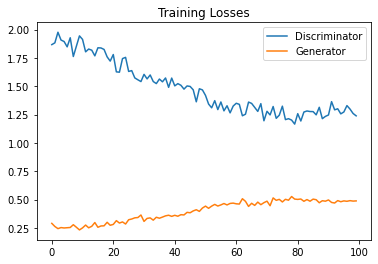

In [ ]:
losses = np.array(losses)

fig, ax = plt.subplots()
plt.plot(losses.T[0], label='Discriminator')
plt.plot(losses.T[1], label='Generator')
plt.title("Training Losses")
plt.legend()
plt.show()

In [ ]:
rr = discriminator.predict_on_batch(X_test_real)

In [ ]:
import keras
#import keras_metrics

r = tf.keras.metrics.Recall()#thresholds=rr.min())
r.update_state(y_test,rr )
r.result().numpy()


0.99529254

In [ ]:
p=tf.keras.metrics.Precision()#thresholds=rr.min())
p.update_state(y_test,rr )
p.result().numpy()

0.9912927

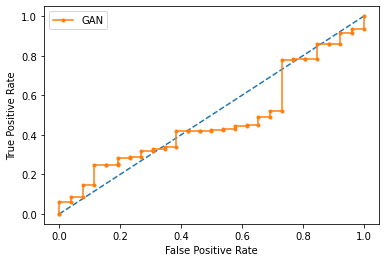


 Logistic ROC AUC 0.473


In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve



yhat = discriminator.predict_on_batch(X_test_real)
pos_probs = yhat[:, :]
pyplot.plot([0, 1], [0, 1], linestyle='--')
fpr, tpr, _ = roc_curve(y_test, pos_probs)
pyplot.plot(fpr, tpr, marker='.', label='GAN')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

roc_auc = roc_auc_score(y_test, pos_probs)
print('\n','Logistic ROC AUC %.3f' % roc_auc)